In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Meiryo"


In [75]:
#遷移確率行列を作成
NEKOMEME_TRANS_PROB = np.array([
    [1/2,1/2,0,0,0,0,0], #チピ
    [0,1/2,1/2,0,0,0,0], #チャパ
    [0,0,1/2,1/4,0,0,1/4], #ドゥビ
    [0,0,0,1/2,1/2,0,0], #ダバ
    [0,0,0,0,0,1,0], #マヒ
    [0,0,1,0,0,0,0], #コミ
    [0.25,0,0,0,0,0,0.75], #ブン
])
labels = ["chipi", "chapa", "dubi", "daba", "Mági", "comi", "boom"]
labels_jp = ["チピ", "チャパ", "ドゥビ", "ダバ", "マヒ", "コミ", "ブン"]


In [4]:
NEKOMEME_TRANS_PROB.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1.])

In [5]:
NEKOMEME_TRANS_PROB.shape

(7, 7)

In [72]:
import graphviz
from graphviz import Digraph

import numpy as np

def Graphviz(prob_matrix, node_label):
    states = len(node_label)  # 状態の数はノードラベルのリストの長さから得る
    g = Digraph()

    for i in range(states):
        g.node(str(i), label=node_label[i])

    for i in range(states):
        for j in range(states):
            if prob_matrix[i, j] > 0:
                g.edge(str(i), str(j), label=str(round(prob_matrix[i, j], 2)))

    g.attr('node', fontname = 'Meiryo UI')
    g.attr('edge', fontname = 'Meiryo UI')
    return g


# グラフを生成
g = Graphviz(NEKOMEME_TRANS_PROB, labels)

# g.view()  # 実行環境によってはこの行をコメントアウトまたは修正する必要があるかもしれません
g.format = "png"
g.render("data/nekomeme.png",view=True)

'data\\nekomeme.png.png'

In [11]:
#n回目までの単語の推移を計算
n = 20
w = np.array([1,0,0,0,0,0,0])
w_list = np.zeros((7, n))     #推移を記録する箱を作成
w_list[:,0] = w                 #初期値を記録
for k in range(1, n):
    w = w.dot(NEKOMEME_TRANS_PROB)        # 次期の確率の計算
    w_list[:,k] = w     # 推移後の確率を記録

print(w)

[0.12503873 0.12497627 0.24996104 0.1249815  0.06250119 0.06252295
 0.25001832]


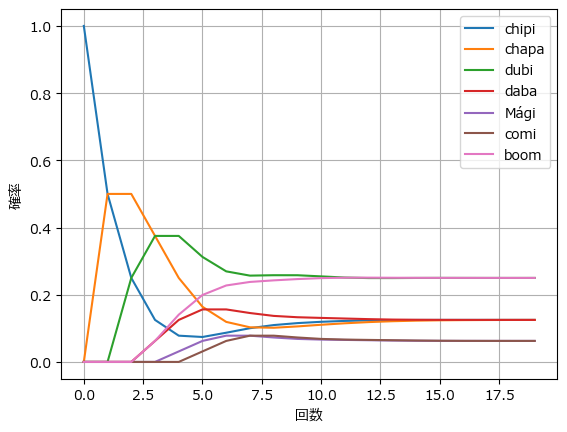

In [18]:
for i in range(7):
    plt.plot(w_list[i,:])
plt.grid()
plt.xlabel('回数')
plt.ylabel('確率')
plt.legend(label)
plt.show()

In [22]:
#n単語目までのDubidubido生成
def generate_dubidubi(transition_prob, labels, n, initial_state):
    # 単語リストを格納する配列を初期化
    word_list = []
    # 現在の状態を初期状態で設定
    current_state = np.random.choice(len(labels), p=initial_state)
    for _ in range(n):
        # 現在の状態に基づいて単語を選択し、リストに追加
        word_list.append(labels[current_state])
        # 遷移確率行列を使用して次の状態をランダムに選択
        current_state = np.random.choice(len(labels), p=transition_prob[current_state])
    return word_list

チピ
チャパ
ドゥビ
ドゥビ
ドゥビ
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
チピ
チャパ
ドゥビ
ドゥビ
ブン
チピ
チピ
チピ
チピ
チャパ
ドゥビ
ドゥビ
ドゥビ
ドゥビ
ブン
ブン
ブン
ブン
チピ
チャパ
ドゥビ
ドゥビ
ブン
チピ
チピ
チャパ
ドゥビ
ドゥビ
ドゥビ
ダバ
マヒ
コミ
ドゥビ
ブン
ブン
チピ
チピ
チピ
チャパ
ドゥビ
ドゥビ
ドゥビ
ブン
ブン
チピ
チャパ
チャパ
チャパ
チャパ
ドゥビ
ブン
チピ
チピ
チピ
チピ
チピ
チャパ
チャパ
ドゥビ
ドゥビ
ダバ
マヒ
コミ
ドゥビ
ドゥビ
ドゥビ
ドゥビ
ドゥビ
ドゥビ
ドゥビ
ダバ
マヒ
コミ
ドゥビ
ブン
ブン
チピ
チャパ
ドゥビ
ドゥビ
ダバ
ダバ
マヒ
コミ
ドゥビ
ドゥビ
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
チピ
チピ
チピ
チャパ
チャパ
チャパ
チャパ
ドゥビ
ドゥビ
ドゥビ
ダバ
ダバ
マヒ
コミ
ドゥビ
ドゥビ
ダバ
ダバ
ダバ
マヒ
コミ
ドゥビ
ドゥビ
ドゥビ
ドゥビ
ドゥビ
ドゥビ
ダバ
ダバ
ダバ
マヒ
コミ
ドゥビ
ブン
ブン
ブン
ブン
ブン
チピ
チャパ
ドゥビ
ドゥビ
ダバ
ダバ
ダバ
マヒ
コミ
ドゥビ
ブン
ブン
ブン
ブン
チピ
チピ
チャパ
チャパ
ドゥビ
ドゥビ
ドゥビ
ダバ
ダバ
マヒ
コミ
ドゥビ
ドゥビ
ブン
ブン
ブン
ブン
ブン
チピ
チャパ
ドゥビ
ダバ
ダバ
マヒ
コミ
ドゥビ
ダバ
ダバ
ダバ
マヒ


<BarContainer object of 7 artists>

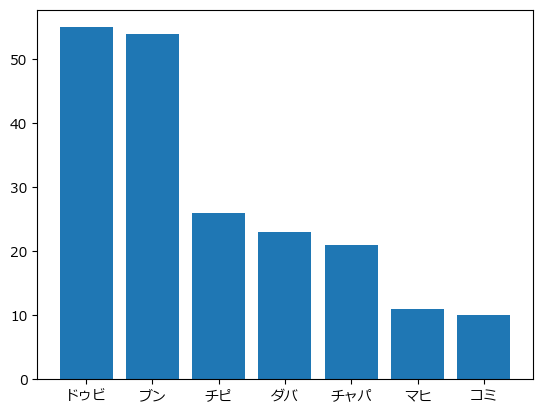

In [76]:
w = np.array([1,0,0,0,0,0,0])
lis = generate_dubidubi(NEKOMEME_TRANS_PROB,labels=labels_jp,n=200,initial_state=w)
for i in lis:
    print(i)
plt.bar(pd.array(lis).value_counts().index,pd.array(lis).value_counts().values)